In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import sklearn as sk
import statsmodels

In [ ]:
Jadavpur_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spark4ai/RP/Data/Jadavpur_processed.csv")

In [ ]:
Jadavpur_df.drop(columns = ['Unnamed: 0', 'To Date'], axis=1, inplace=True)
Jadavpur_df = Jadavpur_df[:34944]
Jadavpur_df.tail()

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,Toluene,Eth-Benzene,MP-Xylene,O-Xylene,RH,WS,WD,SR,BP,VWS
34939,NaN,113.960000,186.160000,14.190000,2.810000,12.900000,15.9400,2.900000,1.090000,14.740000,...,2.020000,0.320000,0.360000,0.170000,87.830000,0.24000,266.040000,17.620000,1011.500000,0.020000
34940,NaN,113.960000,186.160000,13.930000,2.820000,12.700000,16.0000,3.150000,1.090000,14.390000,...,2.040000,0.320000,0.360000,0.170000,90.880000,0.37000,269.260000,18.170000,1011.500000,0.010000
34941,NaN,113.960000,186.160000,13.730000,2.700000,12.470000,16.1500,3.020000,1.090000,16.080000,...,2.070000,0.320000,0.370000,0.160000,94.680000,0.29000,262.860000,17.660000,1011.500000,0.010000
34942,NaN,114.140000,186.280000,13.500000,2.620000,12.260000,16.6500,2.980000,1.090000,16.350000,...,2.110000,0.320000,0.360000,0.170000,98.950000,0.26000,260.020000,16.930000,1011.500000,0.040000
34943,NaN,51.588678,98.592673,16.495385,16.845875,30.098814,44.1191,5.473276,0.898116,27.208613,...,1.935962,0.232819,0.430723,0.120907,85.160994,0.37557,185.443624,99.554627,999.020655,-0.002363


In [ ]:
import pandas as pd
start_date = '2023-01-01 00:00:00'
end_date = '2023-12-30 23:45:00'

date_range = pd.date_range(start=start_date, end=end_date, freq='15min')

Jadavpur_df['From Date'] = date_range

# Fill missing values in 'From Date' column with the next available date
Jadavpur_df['From Date'].fillna(method='ffill', inplace=True)
Jadavpur_df.tail()

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,Toluene,Eth-Benzene,MP-Xylene,O-Xylene,RH,WS,WD,SR,BP,VWS
34939,2023-12-30 22:45:00,113.960000,186.160000,14.190000,2.810000,12.900000,15.9400,2.900000,1.090000,14.740000,...,2.020000,0.320000,0.360000,0.170000,87.830000,0.24000,266.040000,17.620000,1011.500000,0.020000
34940,2023-12-30 23:00:00,113.960000,186.160000,13.930000,2.820000,12.700000,16.0000,3.150000,1.090000,14.390000,...,2.040000,0.320000,0.360000,0.170000,90.880000,0.37000,269.260000,18.170000,1011.500000,0.010000
34941,2023-12-30 23:15:00,113.960000,186.160000,13.730000,2.700000,12.470000,16.1500,3.020000,1.090000,16.080000,...,2.070000,0.320000,0.370000,0.160000,94.680000,0.29000,262.860000,17.660000,1011.500000,0.010000
34942,2023-12-30 23:30:00,114.140000,186.280000,13.500000,2.620000,12.260000,16.6500,2.980000,1.090000,16.350000,...,2.110000,0.320000,0.360000,0.170000,98.950000,0.26000,260.020000,16.930000,1011.500000,0.040000
34943,2023-12-30 23:45:00,51.588678,98.592673,16.495385,16.845875,30.098814,44.1191,5.473276,0.898116,27.208613,...,1.935962,0.232819,0.430723,0.120907,85.160994,0.37557,185.443624,99.554627,999.020655,-0.002363


In [ ]:
import pandas as pd
Jadavpur_df = Jadavpur_df[["From Date", "PM2.5", "PM10"]]
Jadavpur_df["From Date"] = pd.to_datetime(Jadavpur_df["From Date"])
Jadavpur_df.set_index("From Date", inplace=True)
Jadavpur_df.tail()

<ipython-input-5-7b66200370f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jadavpur_df["From Date"] = pd.to_datetime(Jadavpur_df["From Date"])


,PM2.5,PM10
From Date,,
2023-12-30 22:45:00,113.960000,186.160000
2023-12-30 23:00:00,113.960000,186.160000
2023-12-30 23:15:00,113.960000,186.160000
2023-12-30 23:30:00,114.140000,186.280000
2023-12-30 23:45:00,51.588678,98.592673


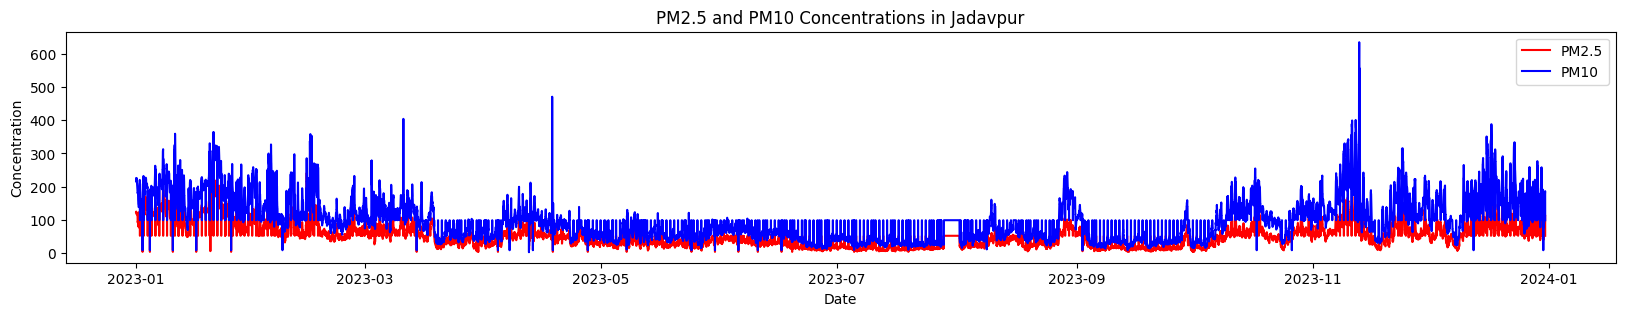

In [ ]:
import matplotlib.pyplot as plt

# Extract the columns to be plotted
pm25_data = Jadavpur_df["PM2.5"]
pm10_data = Jadavpur_df["PM10"]

# Create the plot
plt.figure(figsize=(20, 3))

# Plot the PM2.5 data
plt.plot(pm25_data, color="red", label="PM2.5")

# Plot the PM10 data
plt.plot(pm10_data, color="blue", label="PM10")

# Add a legend
plt.legend()

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.title("PM2.5 and PM10 Concentrations in Jadavpur")

# Show the plot
plt.show()


In [ ]:
Jadavpur_df.describe()

,PM2.5,PM10
count,34944.000000,34944.000000
mean,51.499647,98.460362
std,37.407942,67.065138
min,2.820000,1.960000
25%,21.920000,44.900000
50%,44.080000,81.640000
75%,69.980000,135.462500
max,322.950000,635.860000


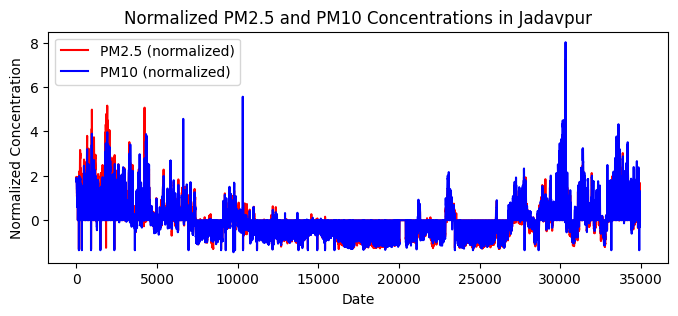

In [ ]:
import matplotlib.pyplot as plt
# Z-score normalization
from sklearn.preprocessing import StandardScaler

# Normalize the PM2.5 and PM10 data
scaler_pm25 = StandardScaler()
scaler_pm10 = StandardScaler()

normalized_pm25 = scaler_pm25.fit_transform(Jadavpur_df["PM2.5"].values.reshape(-1, 1))
normalized_pm10 = scaler_pm10.fit_transform(Jadavpur_df["PM10"].values.reshape(-1, 1))

# Create the plot
plt.figure(figsize=(8, 3))

# Plot the normalized PM2.5 data
plt.plot(normalized_pm25, color="red", label="PM2.5 (normalized)")

# Plot the normalized PM10 data
plt.plot(normalized_pm10, color="blue", label="PM10 (normalized)")

# Add a legend
plt.legend()

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Normalized Concentration")
plt.title("Normalized PM2.5 and PM10 Concentrations in Jadavpur")

# Show the plot
plt.show()

In [ ]:
Jadavpur_df["PM2.5_normalized"] = normalized_pm25
Jadavpur_df["PM10_normalized"] = normalized_pm10
Jadavpur_df.head()


,PM2.5,PM10,PM2.5_normalized,PM10_normalized
From Date,,,,
2023-01-01 00:00:00,123.28,224.03,1.918881,1.872380
2023-01-01 00:15:00,124.61,218.47,1.954435,1.789475
2023-01-01 00:30:00,124.61,218.47,1.954435,1.789475
2023-01-01 00:45:00,124.61,218.47,1.954435,1.789475
2023-01-01 01:00:00,123.88,217.91,1.934920,1.781124


In [ ]:
Jadavpur_df_normalized = Jadavpur_df[["PM2.5_normalized", "PM10_normalized"]].copy()

In [ ]:
Jadavpur_df_normalized.head()

,PM2.5_normalized,PM10_normalized
From Date,,
2023-01-01 00:00:00,1.918881,1.872380
2023-01-01 00:15:00,1.954435,1.789475
2023-01-01 00:30:00,1.954435,1.789475
2023-01-01 00:45:00,1.954435,1.789475
2023-01-01 01:00:00,1.934920,1.781124


In [ ]:
for column in Jadavpur_df_normalized.columns:
    result = adfuller(Jadavpur_df_normalized[column])
    print(f"Augmented Dickey-Fuller Test for {column}:")
    labels = ['ADF Statistic', 'p-value', '#Lags', 'No. of Observations Used']
    for i, j in zip(result, labels):
        print(f"{j:25} = {i}")

Augmented Dickey-Fuller Test for PM2.5_normalized:
ADF Statistic             = -7.440980079152115
p-value                   = 6.007005953033068e-11
#Lags                     = 51
No. of Observations Used  = 34892
Augmented Dickey-Fuller Test for PM10_normalized:
ADF Statistic             = -7.973226224418727
p-value                   = 2.7455692725052354e-12
#Lags                     = 45
No. of Observations Used  = 34898


In [ ]:
# Split the dataset into training, validation, and testing sets (70% training, 15% validation, 15% testing)
train_size = int(len(Jadavpur_df_normalized) * 0.75)
val_size = int(len(Jadavpur_df_normalized) * 0.15)
test_size = len(Jadavpur_df_normalized) - train_size - val_size


In [ ]:
train_data = Jadavpur_df_normalized[:train_size]
val_data = Jadavpur_df_normalized[train_size:train_size + val_size]
test_data = Jadavpur_df_normalized[train_size + val_size:]

print(f"Train data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (26208, 2)
Validation data shape: (5241, 2)
Test data shape: (3495, 2)


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np

# Parameters
input_size = 2  # Number of features (PM2.5_normalized, PM10_normalized)
hidden_size = 20  # Example hidden size
num_layers = 2  # Number of LSTM layers
output_size = input_size  # Output size should match input size for reconstruction tasks
batch_size = 32  # Example batch size
learning_rate = 0.001
num_epochs = 10  # Example number of epochs
sequence_length = 4  # Number of time steps in each sequence

# Function to create sequences
def create_sequences(df, sequence_length):
    sequences = []
    for i in range(len(df) - sequence_length):
        sequence = df.iloc[i:i+sequence_length].values
        sequences.append(sequence)
    return np.array(sequences)

# Create sequences
train_sequences = create_sequences(train_data, sequence_length)
val_sequences = create_sequences(val_data, sequence_length)
test_sequences = create_sequences(test_data, sequence_length)

# Convert to PyTorch tensors
train_sequences = torch.tensor(train_sequences, dtype=torch.float32)
val_sequences = torch.tensor(val_sequences, dtype=torch.float32)
test_sequences = torch.tensor(test_sequences, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(train_sequences)
val_dataset = TensorDataset(val_sequences)
test_dataset = TensorDataset(test_sequences)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        c0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Using the last time step
        return out

Epoch [1/10], Train Loss: 0.0968, Val Loss: 0.0384
Epoch [2/10], Train Loss: 0.0050, Val Loss: 0.0199
Epoch [3/10], Train Loss: 0.0027, Val Loss: 0.0148
Epoch [4/10], Train Loss: 0.0014, Val Loss: 0.0121
Epoch [5/10], Train Loss: 0.0008, Val Loss: 0.0094
Epoch [6/10], Train Loss: 0.0005, Val Loss: 0.0077
Epoch [7/10], Train Loss: 0.0003, Val Loss: 0.0070
Epoch [8/10], Train Loss: 0.0003, Val Loss: 0.0055
Epoch [9/10], Train Loss: 0.0002, Val Loss: 0.0055
Epoch [10/10], Train Loss: 0.0002, Val Loss: 0.0052


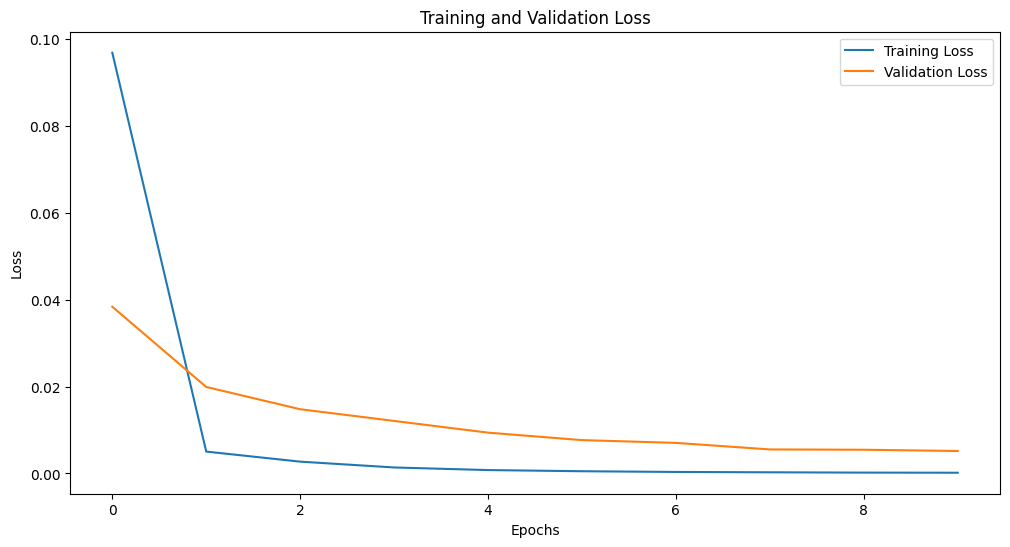

In [ ]:
# Create the model
model = LSTM(input_size, hidden_size, num_layers, output_size).to('cuda')

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop with validation
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for i, (inputs,) in enumerate(train_loader):
        inputs = inputs.to('cuda')

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, inputs[:, -1, :])  # Compare only the last time step

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

    # Calculate average training loss
    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation step
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, in val_loader:
            inputs = inputs.to('cuda')
            outputs = model(inputs)
            loss = criterion(outputs, inputs[:, -1, :])
            running_val_loss += loss.item()

    # Calculate average validation loss
    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [ ]:
# Evaluation on test data and visualization
model.eval()
all_predictions = []
all_targets = []
with torch.no_grad():
    for inputs, in test_loader:
        inputs = inputs.to('cuda')
        outputs = model(inputs)
        all_predictions.append(outputs.cpu().numpy())
        all_targets.append(inputs[:, -1, :].cpu().numpy())

In [ ]:
# Convert lists to numpy arrays
all_predictions = np.concatenate(all_predictions, axis=0)
all_targets = np.concatenate(all_targets, axis=0)

In [ ]:
# Inverse transform the normalized data back to original scale
all_predictions_pm25 = scaler_pm25.inverse_transform(all_predictions[:, 0].reshape(-1, 1)).flatten()
all_targets_pm25 = scaler_pm25.inverse_transform(all_targets[:, 0].reshape(-1, 1)).flatten()

all_predictions_pm10 = scaler_pm10.inverse_transform(all_predictions[:, 1].reshape(-1, 1)).flatten()
all_targets_pm10 = scaler_pm10.inverse_transform(all_targets[:, 1].reshape(-1, 1)).flatten()

In [ ]:
# Adding timestamps to the data for plotting
Jadavpur_df["Timestamp"] = Jadavpur_df.index
# Extract timestamps for the test set
test_timestamps = Jadavpur_df["Timestamp"][train_size + val_size + sequence_length:]

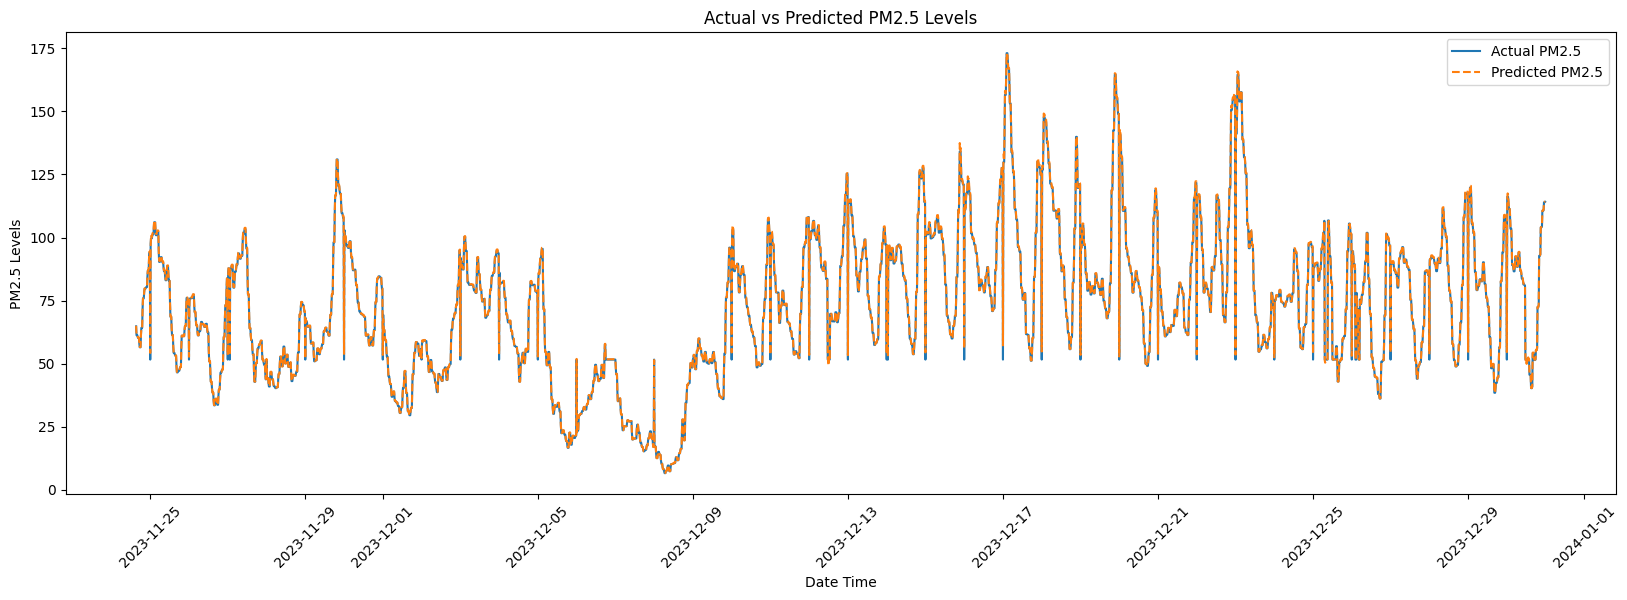

In [ ]:
# Plotting PM2.5 with date-time x-axis
plt.figure(figsize=(20, 6))
plt.plot(test_timestamps, all_targets_pm25, label='Actual PM2.5')
plt.plot(test_timestamps, all_predictions_pm25, label='Predicted PM2.5', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted PM2.5 Levels')
plt.xlabel('Date Time')
plt.ylabel('PM2.5 Levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

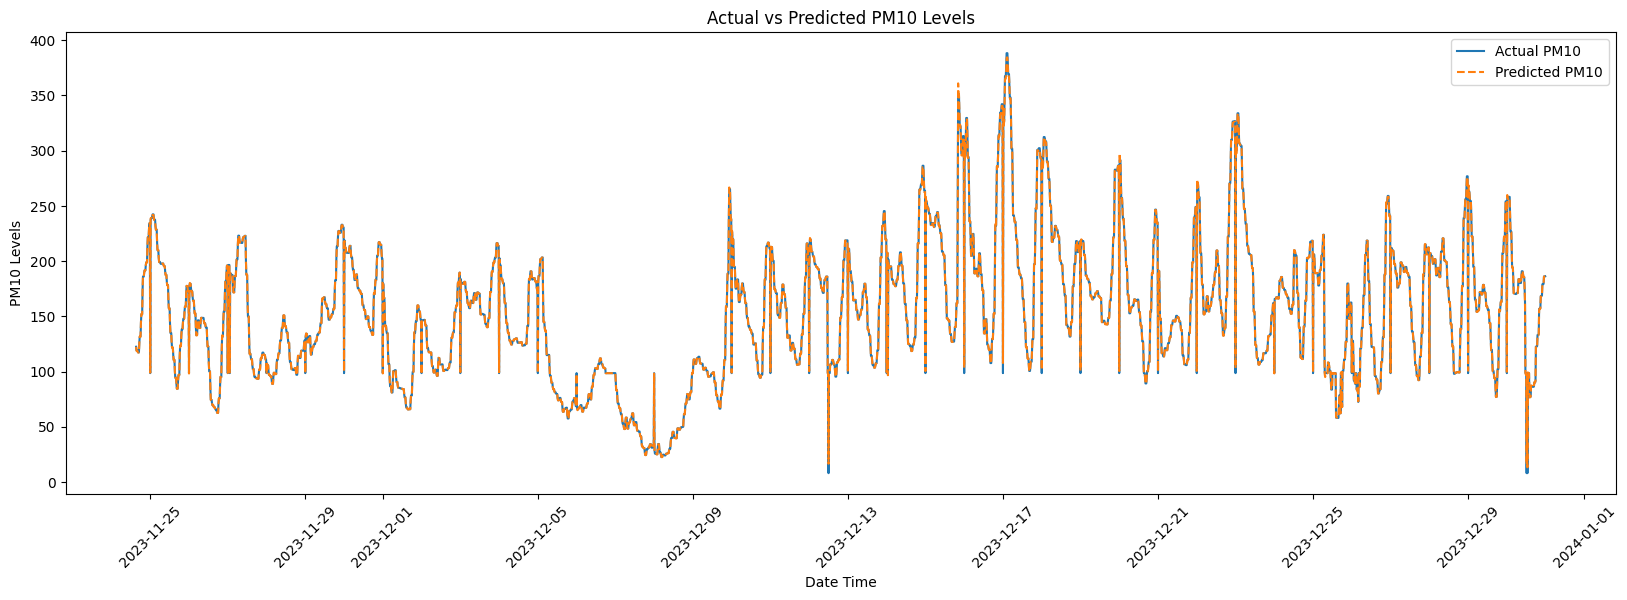

In [ ]:
# Plotting PM10 with date-time x-axis
plt.figure(figsize=(20, 6))
plt.plot(test_timestamps, all_targets_pm10, label='Actual PM10')
plt.plot(test_timestamps, all_predictions_pm10, label='Predicted PM10', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted PM10 Levels')
plt.xlabel('Date Time')
plt.ylabel('PM10 Levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE for PM2.5
rmse_pm25 = np.sqrt(mean_squared_error(all_targets_pm25, all_predictions_pm25))
print(f"RMSE for PM2.5: {rmse_pm25:.4f}")

# Calculate MSE for PM2.5
mse_pm25 = mean_squared_error(all_targets_pm25, all_predictions_pm25)
print(f"MSE for PM2.5: {mse_pm25:.4f}")

# Calculate MAE for PM2.5
mae_pm25 = mean_absolute_error(all_targets_pm25, all_predictions_pm25)
print(f"MAE for PM2.5: {mae_pm25:.4f}")

# Calculate MAPE for PM2.5
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_pm25 = mean_absolute_percentage_error(all_targets_pm25, all_predictions_pm25)
print(f"MAPE for PM2.5: {mape_pm25:.4f}%")

# Calculate RMSE for PM10
rmse_pm10 = np.sqrt(mean_squared_error(all_targets_pm10, all_predictions_pm10))
print(f"RMSE for PM10: {rmse_pm10:.4f}")

# Calculate MSE for PM10
mse_pm10 = mean_squared_error(all_targets_pm10, all_predictions_pm10)
print(f"MSE for PM10: {mse_pm10:.4f}")

# Calculate MAE for PM10
mae_pm10 = mean_absolute_error(all_targets_pm10, all_predictions_pm10)
print(f"MAE for PM10: {mae_pm10:.4f}")

# Calculate MAPE for PM10
mape_pm10 = mean_absolute_percentage_error(all_targets_pm10, all_predictions_pm10)
print(f"MAPE for PM10: {mape_pm10:.4f}%")


RMSE for PM2.5: 0.4371
MSE for PM2.5: 0.1910
MAE for PM2.5: 0.2778
MAPE for PM2.5: 0.3739%
RMSE for PM10: 0.6645
MSE for PM10: 0.4416
MAE for PM10: 0.2628
MAPE for PM10: 0.2414%
